In [166]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
  





## Exercises Part I

Make a file named pandas_series.py or pandas_series.ipynb for the following exercises.

Use pandas to create a Series named fruits from the following list:


    ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]


# Use Series attributes and methods to explore your fruits Series.



Determine the number of elements in fruits.



In [167]:
fruits=pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])
fruits.count()

17

Output only the index from fruits.



In [168]:
print(fruits.index)

RangeIndex(start=0, stop=17, step=1)


Output only the values from fruits.



In [169]:
print(fruits.values)

['kiwi' 'mango' 'strawberry' 'pineapple' 'gala apple' 'honeycrisp apple'
 'tomato' 'watermelon' 'honeydew' 'kiwi' 'kiwi' 'kiwi' 'mango' 'blueberry'
 'blackberry' 'gooseberry' 'papaya']


Confirm the data type of the values in fruits.



In [170]:
print(fruits.values.dtype)


object


Output only the first five values from fruits. Output the last three values. Output two random values from fruits.



In [171]:
fruits.head()

0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object

In [172]:
fruits.tail(3)

14    blackberry
15    gooseberry
16        papaya
dtype: object

In [173]:
a=fruits[np.random.randint(0,17)]
b=fruits[np.random.randint(0,17)]
print(f'two random values:\n{a}\n{b}')

two random values:
honeydew
gala apple


Run the .describe() on fruits to see what information it returns when called on a Series with string values.



In [174]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

Run the code necessary to produce only the unique string values from fruits.



In [175]:
unique_fruits=fruits.unique()
print(unique_fruits)

['kiwi' 'mango' 'strawberry' 'pineapple' 'gala apple' 'honeycrisp apple'
 'tomato' 'watermelon' 'honeydew' 'blueberry' 'blackberry' 'gooseberry'
 'papaya']


Determine how many times each unique string value occurs in fruits.



In [176]:
uniquecounts=fruits.value_counts()
print(uniquecounts)

kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64


Determine the string value that occurs most frequently in fruits.



In [177]:
mostcommon=fruits[fruits.value_counts().argmax()]
print(mostcommon)



kiwi


Determine the string value that occurs least frequently in fruits.



In [178]:
minstring=fruits.value_counts().min()
print(minstring)
print(uniquecounts[uniquecounts.values==minstring])


1
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64


# Indexing and Subsetting

This is where the pandas index shines; we can select subsets of our data using index labels, index position, or boolean sequences (list, array, Series).

I can also pass a sequence of boolean values to the indexing operator, []; that sequence could be a list or array, but it can also be another pandas Series if the index of the boolean Series matches the original Series.


numbers_series

0    100
1     43
2     26
3     17
4     17
Name: Numbers, dtype: int64

# I can see that my condition is being met by the values at index 0 and index 1.

bools = numbers_series > 40
bools

0     True
1     True
2    False
3    False
4    False
Name: Numbers, dtype: bool

# I pass my boolean mask to the original Series to return the values that meet the condition.

numbers_series[bools]

0    100
1     43
Name: Numbers, dtype: int64

# I can simply pass my conditional expression into the indexing operator, too.

numbers_series[numbers_series > 40]

0    100
1     43
Name: Numbers, dtype: int64

# We can create compound logical statements to narrow/expand our subsetting options 
# Wrap parenthese around each comparison
# The pipe | character is the OR

x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Find the numbers that are even or greater than 7
x[(x % 2 == 0) | (x > 7)]

1     2
3     4
5     6
7     8
8     9
9    10
dtype: int64

# Alternative syntax without the parentheses
is_even = x % 2 == 0
greater_than_seven = x > 7

x[is_even & greater_than_seven]

7     8
9    10
dtype: int64

# Find the numbers that are even AND greater than 7
x[(x % 2 == 0) & (x > 7)]

7     8
9    10
dtype: int64

# Alternative syntax without the parentheses
is_even = x % 2 == 0
greater_than_seven = x > 7
x[is_even & greater_than_seven]

7     8
9    10
dtype: int64
More Series Attributes

.str

In addition to vectorized arithmetic operations, pandas also provides us with a way to vectorize string manipulation. Once we access the .str attribute, we can apply a string method to each string value in a Series. Performing string manipulation like this does not mutate my original Series; I have to assign my manipulation to a variable if I want to keep it.

For example, we can call the .lower method, which will convert each string value in the string_series to lowercase.


string_series = pd.Series(['Hello', 'CodeuP', 'StUDenTs'])
string_series

0       Hello
1      CodeuP
2    StUDenTs
dtype: object

string_series.str.lower()

0       hello
1      codeup
2    students
dtype: object

string_series.str.replace('e', '_')

0       H_llo
1      Cod_uP
2    StUD_nTs
dtype: object

# Since each method returns a Series, I can use method chaining like this.

string_series.str.lower().str.replace('e', '_')

0       h_llo
1      cod_up
2    stud_nts
dtype: object

# I can even use method chaining and indexing!

string_series[string_series.str.lower().str.startswith('h')]

0    Hello
dtype: object

# Notice my original string_series is not mutated. 

string_series

0       Hello
1      CodeuP
2    StUDenTs
dtype: object
More Series Methods

.any, .all

We can use the .any method to check if any value in the series is True, and .all, to check if every value in a Series is True. Both methods return a boolean value denoting whether the condition is met.

For example, we could check to see if there are any negative values in a Series like this:


(numbers_series < 0).any()

False

(numbers_series < 0).all()

False
We could check if all the numbers are positive like this:


(numbers_series > 0).any()

True

(numbers_series > 0).all()

True
.isin

The .isin method can be used to tell whether each element in a Series matches an element in a passed sequence of values. For example, if we have a Series of letters, we could use .isin to tell whether each letter is a vowel.


# Create a list of vowels.

vowels = list('aeiou')
vowels

['a', 'e', 'i', 'o', 'u']

# Create a list of letters.

letters = list('abcdefghijk')
letters

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

# Construct a pandas Series from my list of letters.

letters_series = pd.Series(letters)
letters_series

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
dtype: object

# Use .isin to check if each element in letters_series matches an element in my list of vowels.

letters_series.isin(vowels)

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool

# Use my Series of boolean values to return the values that meet my condition.

letters_series[letters_series.isin(vowels)]

0    a
4    e
8    i
dtype: object
.apply

Sometimes there are more complicated operations that we want to perform, and we need to apply a function to each element in a Series. In this case, we can define a function that handles a single value and use the .apply method to apply the function to each element in a Series.


def even_or_odd(n):
    '''
    A function that takes a number and returns a string indicating whether the passed number is even or odd.

    >>> even_or_odd(3)
    'odd'
    >>> even_or_odd(2)
    'even'
    '''
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

numbers_series.apply(even_or_odd)

0    even
1     odd
2    even
3     odd
4     odd
Name: Numbers, dtype: object
Here we define a function, even_or_odd, then reference that function when we call .apply. Notice that when we reference the even_or_odd function, we are not calling the function, rather, we are passing the even_or_odd function itself to the .apply method as an argument, which pandas will then call on every element of the Series.

It is also very common to see lambda functions used along with .apply. We could re-write the above example with a lambda function like so:


numbers_series.apply(lambda n: 'even' if n % 2 == 0 else 'odd')

0    even
1     odd
2    even
3     odd
4     odd
Name: Numbers, dtype: object




## Exercises Part II



Explore more attributes and methods while you continue to work with the fruits Series.



Capitalize all the string values in fruits.



In [179]:
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

Count the letter "a" in all the string values (use string vectorization).



In [180]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

Output the number of vowels in each and every string value.



In [181]:
# fruits.str.count('a'|'e'|'i'|'o'|'u')
vowels=['a','e','i','o','u']

def countn(n):
    str(n)
    count=0
    for v in vowels:
        for i in n:
            if i==v:
                count+=1
    return count
    


fruits.apply(countn)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

Write the code to get the longest string value from fruits.



In [182]:
fruits[fruits.str.len().idxmax()]

'honeycrisp apple'

Write the code to get the string values with 5 or more letters in the name.



In [183]:
fruits[fruits.str.len()>=5]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

Find the fruit(s) containing the letter "o" two or more times.



In [184]:
fruits[fruits.str.count('o')>=2]

6         tomato
15    gooseberry
dtype: object

Write the code to get only the string values containing the substring "berry".



In [185]:
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

Write the code to get only the string values containing the substring "apple".



In [186]:
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

Which string value contains the most vowels?



In [187]:
fruits[fruits.str.count('[aeiou]]').idxmax()]

'kiwi'

Binning Data

I can bin continuous data to convert it to categorical data. We will look at two different ways to accomplish binning below.


s = pd.Series(list(range(15)))
s

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
dtype: int64
pd.cut(s, bins=n)

We can either specify the number of bins to create, and pandas will create bins of equal size, or we can specify the bin edges ourselves by passing a list of bin edges or cutoffs.


# Bin values into 3 equal-sized bins.

pd.cut(s, 3)

0     (-0.014, 4.667]
1     (-0.014, 4.667]
2     (-0.014, 4.667]
3     (-0.014, 4.667]
4     (-0.014, 4.667]
5      (4.667, 9.333]
6      (4.667, 9.333]
7      (4.667, 9.333]
8      (4.667, 9.333]
9      (4.667, 9.333]
10      (9.333, 14.0]
11      (9.333, 14.0]
12      (9.333, 14.0]
13      (9.333, 14.0]
14      (9.333, 14.0]
dtype: category
Categories (3, interval[float64, right]): [(-0.014, 4.667] < (4.667, 9.333] < (9.333, 14.0]]

# Bin values into bins with the cutoffs I specify. The bins are no longer of equal size.

pd.cut(s, [-1, 3, 12, 16])

0      (-1, 3]
1      (-1, 3]
2      (-1, 3]
3      (-1, 3]
4      (3, 12]
5      (3, 12]
6      (3, 12]
7      (3, 12]
8      (3, 12]
9      (3, 12]
10     (3, 12]
11     (3, 12]
12     (3, 12]
13    (12, 16]
14    (12, 16]
dtype: category
Categories (3, interval[int64, right]): [(-1, 3] < (3, 12] < (12, 16]]

# How many values fall into each bin? I can chain on the value_counts method.

pd.cut(s, 3).value_counts()

(-0.014, 4.667]    5
(4.667, 9.333]     5
(9.333, 14.0]      5
dtype: int64
value_counts(bins=n)

The value_counts method can also be valuable here. It has a parameter named bins, which will allow us to quickly bin and group our data at the same time if that is our desired end goal.


s.value_counts(bins=3)

(-0.015, 4.667]    5
(4.667, 9.333]     5
(9.333, 14.0]      5
dtype: int64
Plotting Data

The .plot() method allows us to quickly visualize the data in a Series. It's built on top of Matplotlib!

By default, Matplotlib will choose the best type of plot for us.

We can also customize our plot using the paramters of the .plot method or by using Matplot lib if we like. We will look at examples of both ways below.

Check the docs here for more on the .plot() method.


# Matplotlib is choosing the plot for us here, and it might tell the story we want.

nums_series = pd.Series([1, 5, 5, 5, 10, 20, 100, 40])
nums_series.plot()

plt.show()
png

We can also use specific types of visualizations like this:


# So, here we specify the type of plot we would like Matplotlib to use.
nums_series.plot.hist()

plt.show()
png

The .value_counts method returns a Series, so we can call .plot method on the resulting Series; this is called method chaining.


# Construct the Series.
lets_series = pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a'])

# Plot the value_counts of our Series. Rotate our x-tick values.
lets_series.value_counts().plot.bar(rot=0)

plt.show()
png

Any additional keyword arguments passed to pandas .plot method will be passed along to the corresponding Matplotlib functions. In addition, we can use Matplotlib the same way we have before to set titles, tweak axis labels, etc. Let's look at both ways.


# Use the parameters of the .plot method to customize my chart.

pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar(title='Example Pandas Visualization', 
                                                                            rot=0, 
                                                                            color='firebrick', 
                                                                            ec='black',
                                                                            width=.9).set(xlabel='Letter',
                                                                                         ylabel='Frequency')

plt.show()
png


# Use Matplotlib to customize.

pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar(color='firebrick', width=.9)
plt.title('Example Pandas Visualization')
plt.xticks(rotation=0)
plt.xlabel('Letter')
plt.ylabel('Frequency')

plt.show()
png

Further Reading

pandas intro tutorials on
pandas user guide
pandas documentation: Series



## Exercises Part III



Use pandas to create a Series named letters from the following string. The easiest way to make this string into a Pandas series is to use list to convert each individual letter into a single string on a basic Python list.


    'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'


In [188]:
letters='hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
letters=list(letters)
letters=pd.Series(letters)
print(letters)
alphabet = [chr(value) for value in range(ord('a'), ord('a') + 26)]
print(alphabet)

alpha_array_forbins=[i for i in range(1,27)]
# print(alpha_array_forbins,len(alpha_array_forbins))



0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [189]:

letters.value_counts()

y    13
p    12
w    10
b     9
n     9
k     9
m     9
r     8
a     8
o     8
h     8
x     8
q     8
c     8
d     8
u     7
v     7
t     7
z     7
e     6
f     6
j     6
g     5
i     5
s     5
l     4
dtype: int64

Which letter occurs the most frequently in the letters Series?



In [190]:
maxlettercount=letters.value_counts()
maxval=max(maxlettercount.values)

maxlettercount[maxlettercount.values==maxval]

y    13
dtype: int64

Which letter occurs the Least frequently?



In [191]:
minlettercount=letters.value_counts(sort=True,ascending=True)
minval=min(minlettercount.values)


minlettercount[minlettercount.values==minval]

l    4
dtype: int64

How many vowels are in the Series?



In [192]:
vowelsinletters=letters.apply(countn)
sumofvowels=vowelsinletters.values.sum()
sumofvowels

34

How many consonants are in the Series?



In [193]:
sum_of_letters=letters.count()
sum_of_consonants=sum_of_letters-sumofvowels
print(sum_of_consonants)

166


Create a Series that has all of the same letters but uppercased.



In [194]:
uppercase_letters=letters.str.upper()
print(uppercase_letters)

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object


Create a bar plot of the frequencies of the 6 most commonly occuring letters.



<AxesSubplot:>

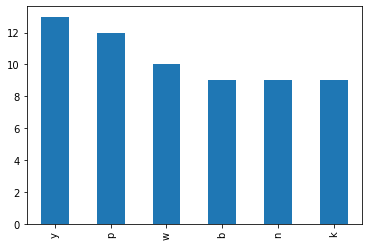

In [195]:
top_six=letters.value_counts().nlargest(6)
top_six.plot.bar()

Use pandas to create a Series named numbers from the following list:


    ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']


In [196]:
numbers=['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

numbers=pd.Series(numbers)
numbers.describe()


count              20
unique             20
top       $796,459.41
freq                1
dtype: object

What is the data type of the numbers Series?



In [197]:
print(numbers.values.dtype)

object


How many elements are in the number Series?



In [198]:
print(numbers.count())

20


Perform the necessary manipulations by accessing Series attributes and methods to convert the numbers Series to a numeric data type.



In [199]:
numbers=numbers.str.strip('$')
print(f'{type(numbers)}\n{numbers.describe()}')
numbers=numbers.str.replace(',','')
print(f'{type(numbers)}\n{numbers.describe()}')
numbers=pd.to_numeric(numbers)
numbers=pd.Series(numbers)
numbers.describe()


<class 'pandas.core.series.Series'>
count             20
unique            20
top       796,459.41
freq               1
dtype: object
<class 'pandas.core.series.Series'>
count            20
unique           20
top       796459.41
freq              1
dtype: object


count    2.000000e+01
mean     2.284406e+06
std      1.735261e+06
min      2.786000e+02
25%      7.259403e+05
50%      1.940065e+06
75%      4.188482e+06
max      4.789988e+06
dtype: float64

Run the code to discover the maximum value from the Series.



In [200]:
numsmax=numbers.max()
print(numsmax)

4789988.17


Run the code to discover the minimum value from the Series.



In [201]:
numsmin=numbers.min()
print(numsmin)

278.6


What is the range of the values in the Series?



In [202]:
range_nums=numsmax-numsmin
print(range_nums)

4789709.57


Bin the data into 4 equally sized intervals or bins and output how many values fall into each bin.



In [203]:
nums_4bin=numbers.value_counts(bins=4)
print(nums_4bin)

(-4511.111, 1197705.993]      7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64


Plot the binned data in a meaningful way. Be sure to include a title and axis labels.



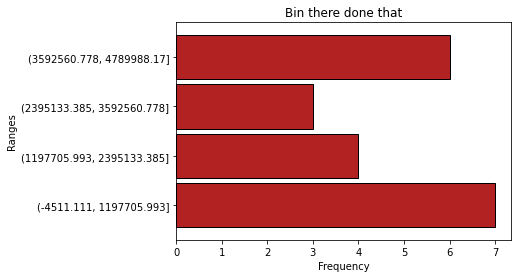

In [215]:
plot1=nums_4bin.sort_index().plot.barh(title='Bin there done that',rot=0,color='firebrick',ec='black',width=.9).set(xlabel='Frequency',ylabel='Ranges')

plt.show()

Use pandas to create a Series named exam_scores from the following list:


    [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]


In [205]:
exam_scores=   [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
exam_scores=pd.Series(exam_scores)
exam_scores.describe(include='all')

count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64

How many elements are in the exam_scores Series?



In [206]:
exam_scores.count()

20

Run the code to discover the minimum, the maximum, the mean, and the median scores for the exam_scores Series.



In [207]:
exam_scores.min()


60

In [208]:
exam_scores.max()

96

In [209]:
exam_scores.mean()


78.15

In [210]:
exam_scores.median()

79.0

Plot the Series in a meaningful way and make sure your chart has a title and axis labels.



[Text(0.5, 0, 'Exam'), Text(0, 0.5, 'Scores')]

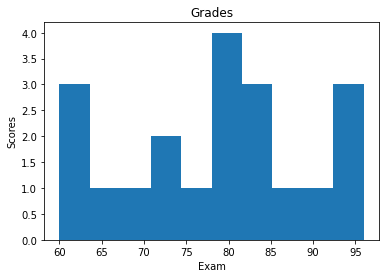

In [219]:
exam_scores.sort_values().plot.hist(title='Grades').set(xlabel='Exam',ylabel='Scores')

Write the code necessary to implement a curve for your exam_grades Series and save this as curved_grades. Add the necessary points to the highest grade to make it 100, and add the same number of points to every other score in the Series as well.



In [212]:
curve=100-exam_scores.max()
curved_grades=exam_scores.add(curve)

print(curved_grades)

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64


Use a method to convert each of the numeric values in the curved_grades Series into a categorical value of letter grades. For example, 86 should be a 'B' and 95 should be an 'A'. Save this as a Series named letter_grades.



In [213]:
bin_range_ends=[0,70,75,80,90,101]
labels_bins=['A','B','C','D','F']
labels_bins.sort(reverse=True)
print(labels_bins)
letter_grades=pd.cut(curved_grades,bins=bin_range_ends,labels=labels_bins)
print(letter_grades)

['F', 'D', 'C', 'B', 'A']
0     F
1     B
2     C
3     F
4     A
5     D
6     F
7     B
8     A
9     B
10    F
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    B
dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']


Plot your new categorical letter_grades Series in a meaninful way and include a title and axis labels.


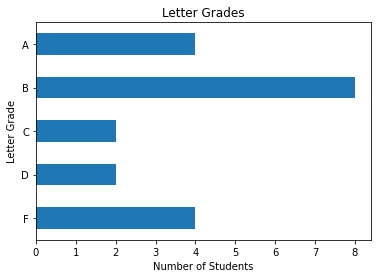

In [214]:
letter_grades.value_counts().sort_index().plot.barh()
plt.title('Letter Grades')
plt.xlabel('Number of Students')
plt.ylabel('Letter Grade')

plt.show()


## More Practice

Revisit the exercises from https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a.

After you complete each set of Series exercises, use any extra time you have to pursue the challenge below. You can work on these in the same notebook or file as the Series exercises or create a new practice notebook you can work in a little every day to keep your python and pandas skills sharp by trying to solve problems in multiple ways. These are not a part of the Series exercises grade, so don't worry if it takes you days or weeks to meet the challenge.

Challenge yourself to be able to...

solve each using vanilla python.

solve each using list comprehensions.

solve each by using a pandas Series for the data structure instead of lists and using vectorized operations instead of loops and list comprehensions.

